<a href="https://colab.research.google.com/github/bindukovvada/Data-Science/blob/main/Bindu_Hotel_Booking_Analysis_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

##*We will answer these Questions in this Project.*


In [3]:
'''
1. How many booking were cancelled?
2. Which is the busiest month for Hotels?
3. What is the percentage of booking for each year?

'''

'\n1. How many booking were cancelled?\n2. What is the resort ratio between Resort Hotel and City Hotel?\n3. What is the percentage of booking for each year?\n4. Which is the busiest month for Hotels?\n5. From which country most guests come?\n6. How long people stay in the Hotel?\n7. Which was the most booked accommodation type? (Single, Couple, Family)\n'

*First we have to import neccessary packages*




In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



*Now Import and display the dataset*

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Copy of Hotel Bookings.csv'

In [7]:
df = pd.read_csv(file_path)

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


*Copying the dataset*

In [9]:
hotel_df = df


*Finding size of the dataset*

In [10]:
hotel_df.shape

(119390, 32)


*Viewing all the columns*

In [11]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


##*1. Finding Null values*

In [12]:
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
hotel_df['agent'].fillna(0, inplace = True)
hotel_df['company'].fillna(0, inplace = True)


In [14]:
hotel_df['children'].fillna(df['children'].mean(), inplace = True)

*And our country column contains country codes representing different countries. 
It is a categorical feature so I will also replace it with the mode value. 
The mode value is the value that appears more than any other value. 
So, in this case, I am replacing it with the country that appears the most often.*

In [15]:
hotel_df['country'].fillna(df['country'].mode(), inplace = True)

*There are many rows that have zero guests including adults, children and babies. We will remove those rows which has zero values*

In [16]:
hotel_df[(hotel_df.adults+hotel_df.children+hotel_df.babies)==0].shape

(180, 32)

In [17]:
hotel_df = hotel_df.drop(hotel_df[(hotel_df.adults+ hotel_df.children+hotel_df.babies)==0].index)

In [18]:
hotel_df[(hotel_df.adults+hotel_df.children+hotel_df.babies)==0].shape

(0, 32)

##*2. Converting Datatype of columns like 'children', 'company', 'agent' \from float to integer*


In [19]:
hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

*Remove the duplicate values*

In [20]:
hotel_df.drop_duplicates(keep=False,inplace = True)

*Finding how many types of hotels are there*


In [21]:
hotel_df['hotel'].value_counts()

City Hotel      47437
Resort Hotel    31632
Name: hotel, dtype: int64

*Which is more populat? City Hotel or Resort Hotel*

In [22]:
hotel_df['hotel'].mode()

0    City Hotel
dtype: object

## **Exploratory Data Analysis**

Now, lets do data analysis and will answer our questions

##1. How many booking were cancelled?


In [114]:
Cancellations = hotel_df.groupby(['is_canceled','hotel'])['hotel'].count()
Cancellations


is_canceled  hotel       
0            City Hotel      33811
             Resort Hotel    24496
1            City Hotel      13626
             Resort Hotel     7136
Name: hotel, dtype: int64

In [115]:
Cancellation1= pd.DataFrame(Cancellations)
Cancellation1

hotel
is_canceled hotel              
0           City Hotel    33811
            Resort Hotel  24496
1           City Hotel    13626
            Resort Hotel   7136

is_canceled have two unique values: 1 if booking got canceled, else 0.

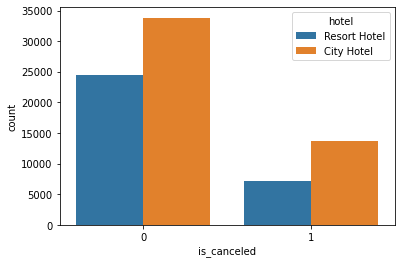

In [125]:
sns.countplot(x = 'is_canceled', hue='hotel', data=hotel_df)

##2. which is the busiest month for hotels??

```
# This is formatted as code
```



In [63]:
Busiest_month = hotel_df['arrival_date_month'].value_counts().reset_index()
Busiest_month.columns=['month','values']
Busiest_month

,month,values
0,August,10451
1,July,9282
2,May,7478
3,April,7083
4,June,7049
5,March,6831
6,October,5982
7,September,5884
8,February,5627
9,December,4609


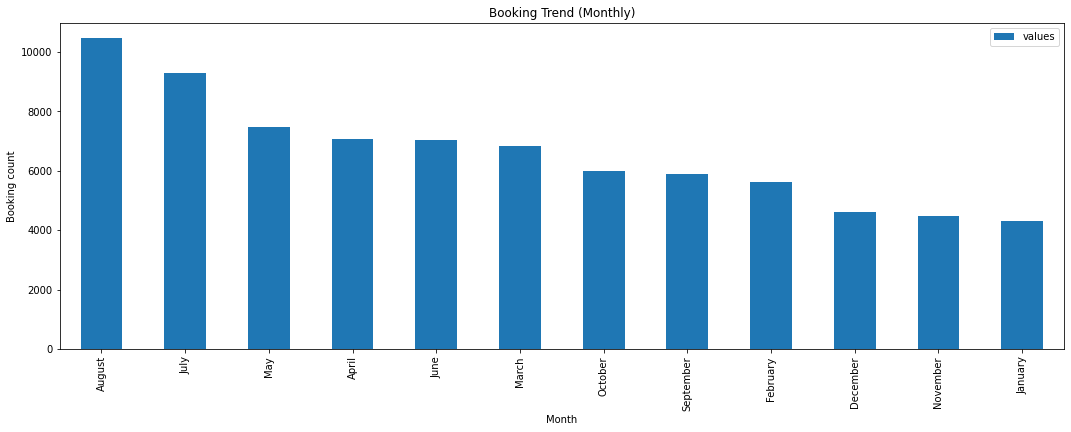

In [91]:
Busiest_month.plot('month', 'values', xlabel = 'Month', ylabel = 'Booking count', title='Booking Trend (Monthly)', kind='bar',figsize=(18,6))


**As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.**


##3. what is the percentage of booking for each year?

In [131]:
No_of_Bookings = hotel_df['arrival_date_year'].value_counts().reset_index()
No_of_Bookings.columns=['Arrived_year','No_of_People']
No_of_Bookings

,Arrived_year,No_of_People
0,2016,38592
1,2017,28926
2,2015,11551


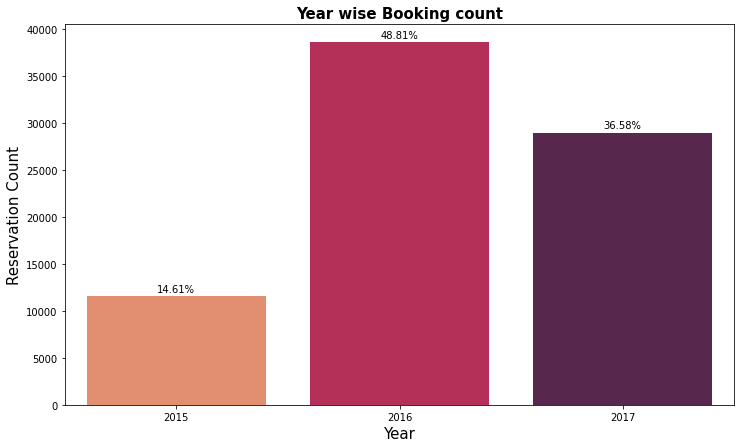

In [157]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(x=hotel_df['arrival_date_year'], palette = 'rocket_r')
plt.title('Year wise Booking count', weight='bold',size = 15)
plt.xlabel('Year',size = 15)
plt.ylabel('Reservation Count',size = 15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/hotel_df.shape[0]*100),ha = "center")

**More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.**